Saving 8. Student Performance Prediction.csv to 8. Student Performance Prediction (15).csv


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


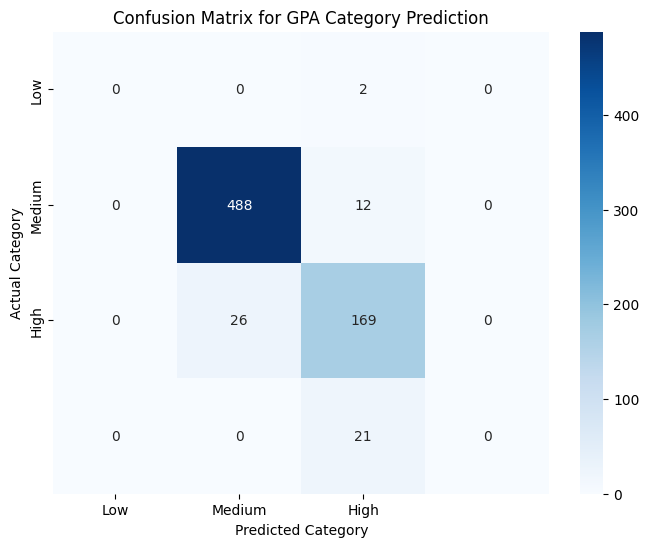

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9150
Precision: 0.8861
Recall: 0.9150


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # Using a classifier now
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import files
import numpy as np
# Upload the CSV file
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
# Load data
try:
    data = pd.read_csv(file_name)
except FileNotFoundError:
    print(f"Error: '{file_name}' not found after upload.")
    exit()
except Exception as e:
    print(f"Error reading the CSV file: {e}")
    exit()
# Feature and target columns
feature_cols = ['Absences', 'ParentalEducation', 'Tutoring', 'Age', 'StudyTimeWeekly', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music']
target_col = 'GPA'
# Define GPA categories
bins = [0, 2.5, 3.5, 4.0]
labels = ['Low', 'Medium', 'High']
data['GPA_Category'] = pd.cut(data[target_col], bins=bins, labels=labels, right=False)
data['GPA_Category'] = data['GPA_Category'].astype('category').cat.codes  # Convert to numerical labels

# Separate features and the new categorical target
X = data[feature_cols]
y_categorical = data['GPA_Category']

# Handle missing values
X = X.fillna(X.mean())

# Split data
X_train, X_test, y_train_cat, y_test_cat = train_test_split(X, y_categorical, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression model (for classification)
model_clf = LogisticRegression(random_state=42, multi_class='ovr')  # Use a classifier
model_clf.fit(X_train_scaled, y_train_cat)

# Make predictions on the test set
y_pred_cat = model_clf.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat)

# Generate a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.title('Confusion Matrix for GPA Category Prediction')
plt.show()

# Calculate evaluation metrics for classification
accuracy = accuracy_score(y_test_cat, y_pred_cat)
precision = precision_score(y_test_cat, y_pred_cat, average='weighted')
recall = recall_score(y_test_cat, y_pred_cat, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
